# Cat vs Dog Classifier using CNN

### Downloading dataset

In [ ]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## Building CNN Model

### Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

### Creating Generators
##### Helpful for processing huge data Converts big data to batches

In [ ]:
train_df = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32, 
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
test_df = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32, 
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


### Normalizing the train data and test data

In [ ]:
# Normalize
def process_data(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_data = train_df.map(process_data)
test_data = test_df.map(process_data)

### Reduce Overfitting
* Add More Data
* Data Augmentation
* L1/L2 Regularization
* Batch Normalization
* Dropout Layers
* Reduce Complexity


In [ ]:
## Create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 1.3696 - accuracy: 0.5786 - val_loss: 0.7144 - val_accuracy: 0.6636
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5710 - accuracy: 0.7042 - val_loss: 0.8764 - val_accuracy: 0.5100
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4914 - accuracy: 0.7667 - val_loss: 0.7244 - val_accuracy: 0.5998
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4190 - accuracy: 0.8086 - val_loss: 0.4651 - val_accuracy: 0.7870
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3615 - accuracy: 0.8436 - val_loss: 1.2198 - val_accuracy: 0.5578
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2924 - accuracy: 0.8730 - val_loss: 0.4594 - val_accuracy: 0.7874
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2246 - accuracy: 0.9075 - val_loss: 0.5245 - val_ac

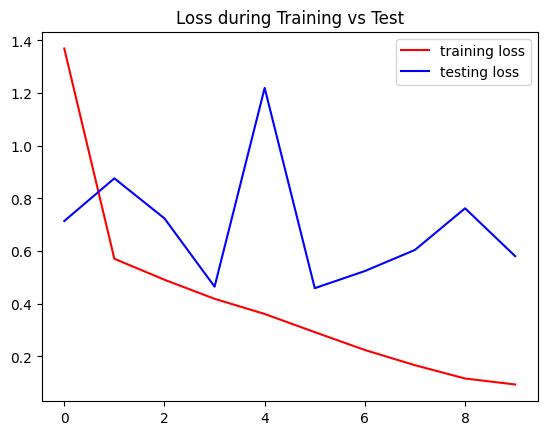

In [ ]:
plt.title('Loss during Training vs Test')
plt.plot(history.history['loss'], color='red', label='training loss')
plt.plot(history.history['val_loss'], color='blue', label='testing loss')
plt.legend()
plt.show()

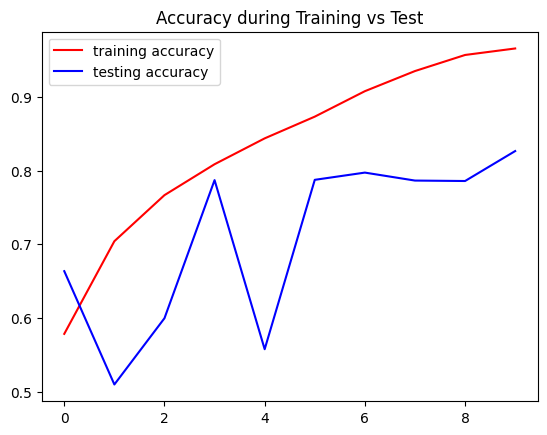

In [ ]:
plt.title('Accuracy during Training vs Test')
plt.plot(history.history['accuracy'], color='red', label='training accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='testing accuracy')
plt.legend()
plt.show()

## Testing on new dataset

In [ ]:
import cv2

In [ ]:
def predict(image_path):
  img = cv2.imread(image_path)
  plt.imshow(img)
  img = cv2.resize(img, (256, 256))
  img_input = img.reshape((1, 256, 256, 3))
  predictions = model.predict(img_input)
  return 'dog' if predictions == 1. else 'cat'

In [ ]:
test_images = ['/content/cat.131.jpg', '/content/cat.25.jpg', '/content/cat.66.jpg', '/content/dog.104.jpg', '/content/dog.169.jpg', '/content/dog.28.jpg']

1/1 [==============================] - 0s 107ms/step


'cat'

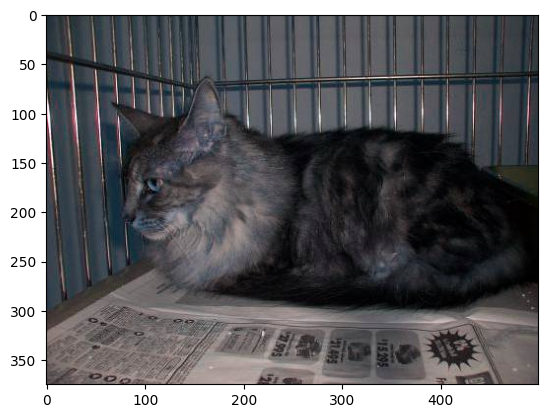

In [ ]:
predict(test_images[0])

1/1 [==============================] - 0s 23ms/step


'dog'

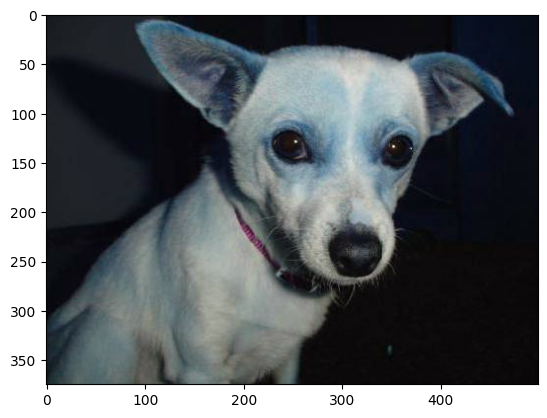

In [ ]:
predict(test_images[3])

1/1 [==============================] - 0s 21ms/step


'cat'

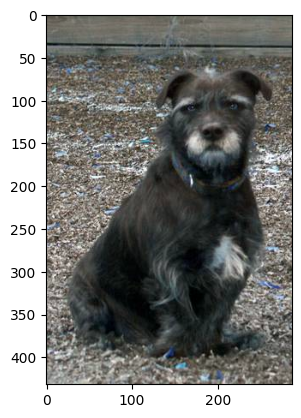

In [ ]:
predict(test_images[5])

1/1 [==============================] - 0s 20ms/step


'cat'

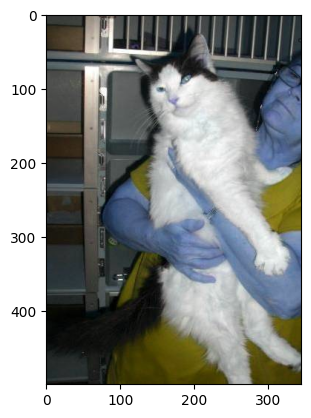

In [ ]:
predict(test_images[1])